In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/home/any1/Documents/I2_Data_Science/Final_Project/data/Student_Depression_Dataset.csv')
data.head()

/home/any1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
# Verify data types and convert categorical variables
categorical_columns = ['Gender', 'City', 'Dietary Habits', 'Degree', 'Family History of Mental Illness']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [5]:
data.isnull().sum()


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
# Summarize missing values before cleaning
missing_before = data.isnull().sum() / len(data) * 100

In [7]:
# Fill missing values for Financial Stress
data.loc[:, 'Financial Stress'] = data['Financial Stress'].fillna(data['Financial Stress'].median())


In [8]:
# Summarize missing values after cleaning
missing_after = data.isnull().sum() / len(data) * 100
missing_summary = pd.DataFrame({'Missing Before (%)': missing_before, 'Missing After (%)': missing_after})
print(missing_summary)

                                       Missing Before (%)  Missing After (%)
id                                               0.000000                0.0
Gender                                           0.000000                0.0
Age                                              0.000000                0.0
City                                             0.000000                0.0
Profession                                       0.000000                0.0
Academic Pressure                                0.000000                0.0
Work Pressure                                    0.000000                0.0
CGPA                                             0.000000                0.0
Study Satisfaction                               0.000000                0.0
Job Satisfaction                                 0.000000                0.0
Sleep Duration                                   0.000000                0.0
Dietary Habits                                   0.000000                0.0

In [9]:
data['Sleep Duration'] = data['Sleep Duration'].map({
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}).fillna(0)  # Replace unmapped values with 0


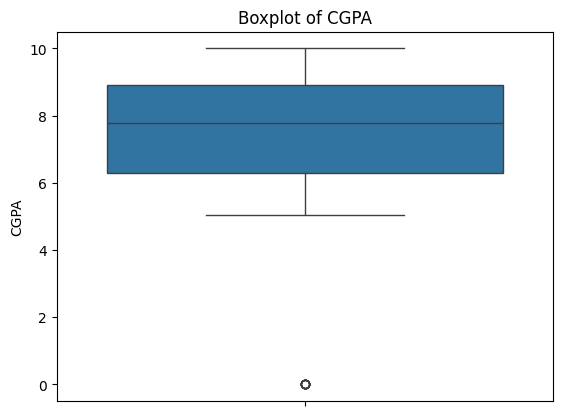

In [10]:
# Check and handle outliers for numeric columns (e.g., CGPA)
sns.boxplot(data['CGPA'])
plt.title('Boxplot of CGPA')
plt.show()

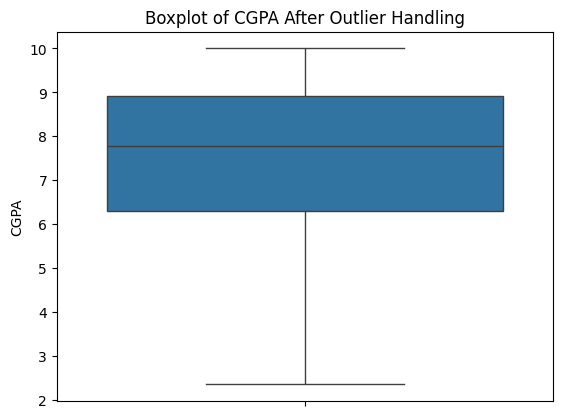

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

q1 = data['CGPA'].quantile(0.25)
q3 = data['CGPA'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data['CGPA'] = data['CGPA'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data['CGPA'])
plt.title('Boxplot of CGPA After Outlier Handling')
plt.ylabel('CGPA')
plt.show()



In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  object  
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  flo

In [13]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2.0,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1.0,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3.0,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2.0,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [14]:
data.to_csv('../data/processed_v1_student_depression.csv', index=False)
